#Paquetes necesarios

Se hará uso del mismo *environment* de la práctica VC_P1, sera necesario añadir la dependencia Pillow al venv

In [22]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import time
from PIL import Image, ImageDraw, ImageFont

Carga imagen desde archivo y convierte a RGB

Dimensiones: 512 x 512, Canales: 3


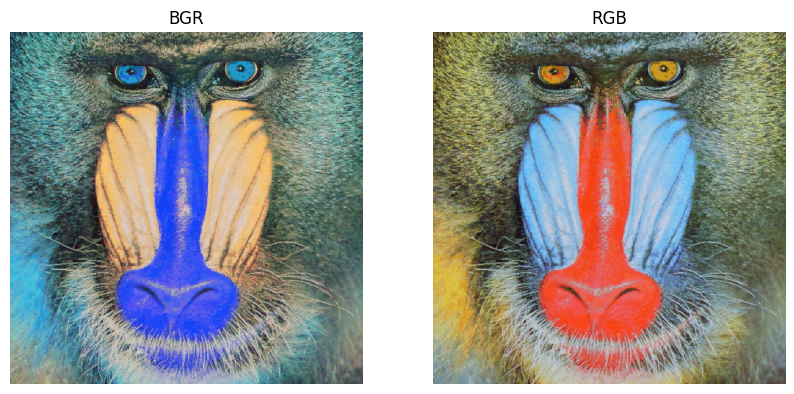

In [23]:
# Carga la imagen
img = cv2.imread('mandril.jpg')

# Verifica si la imagen se cargó correctamente
if img is not None:

    # Obtener las dimensiones y canales de la imagen
    dims = f"Dimensiones: {img.shape[1]} x {img.shape[0]}, Canales: {img.shape[2]}"
    print(dims)

    # Convertir la imagen a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen original y la imagen en RGB
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("BGR")
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.imshow(img_rgb)
    plt.title("RGB")
    plt.axis("off")

    plt.show()

else:
    print('Imagen no encontrada')


Convierte a grises para procesamiento posterior

Dimensiones: 512 x 512, Canales: 3


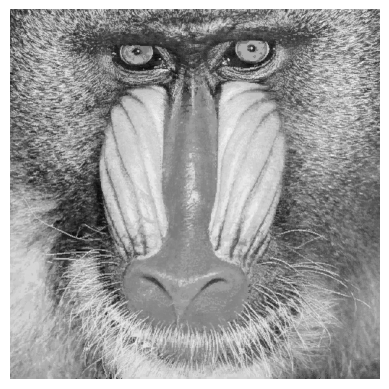

In [24]:
# Convertir la imagen a escala de grises
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Obtener las dimensiones y canales de la imagen
dims = f"Dimensiones: {img.shape[1]} x {img.shape[0]}, Canales: {img.shape[2]}"
print(dims)

# Muestra la imagen en escala de grises
plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray') 
plt.show()

## TAREA 1: Conteo pixeles blancos por filas

Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

In [25]:
# Eleccion del umbral usando la mediana de la imagen
v = np.median(img_gris)
t1 = int(max(0, 0.66 * v))
t2 = int(min(255, 1.33 * v))

# Aplicar filtro Canny con los umbrales calculados
canny = cv2.Canny(img_gris, t1, t2)

# Conteo de píxeles blancos por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:,0] / (255 * canny.shape[1])
maxfil = np.max(rows)
threshold_row = 0.9 * maxfil
rows_above_threshold = np.where(rows >= threshold_row)[0]

# Conteo de píxeles blancos por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0,:] / (255 * canny.shape[0])
maxcol = np.max(cols)
threshold_col = 0.9 * maxcol
cols_above_threshold = np.where(cols >= threshold_col)[0]

# --- Estadísticas filas ---
num_rows = len(rows_above_threshold)
row_avg = np.mean(rows)
print("=== Filas ===")
print(f"Número de filas detectadas: {num_rows}")
print(f"Promedio de % píxeles blancos por fila: {row_avg:.3f}")
print(f"Localización de filas (índices): {rows_above_threshold}")

# --- Estadísticas columnas ---
num_cols = len(cols_above_threshold)
cols_avg = np.mean(cols)
print("\n=== Columnas ===")
print(f"Número de columnas detectadas: {num_cols}")
print(f"Promedio de % píxeles blancos por columna: {cols_avg:.3f}")
print(f"Localización de columnas (índices): {cols_above_threshold}")

=== Filas ===
Número de filas detectadas: 8
Promedio de % píxeles blancos por fila: 0.232
Localización de filas (índices): [  6  12  15  20  21  88  98 100]

=== Columnas ===
Número de columnas detectadas: 20
Promedio de % píxeles blancos por columna: 0.232
Localización de columnas (índices): [ 67  80  92  99 100 103 104 112 115 119 379 380 383 384 386 392 396 403
 405 419]


Visualizacion de filas y columnas sobre el Canny

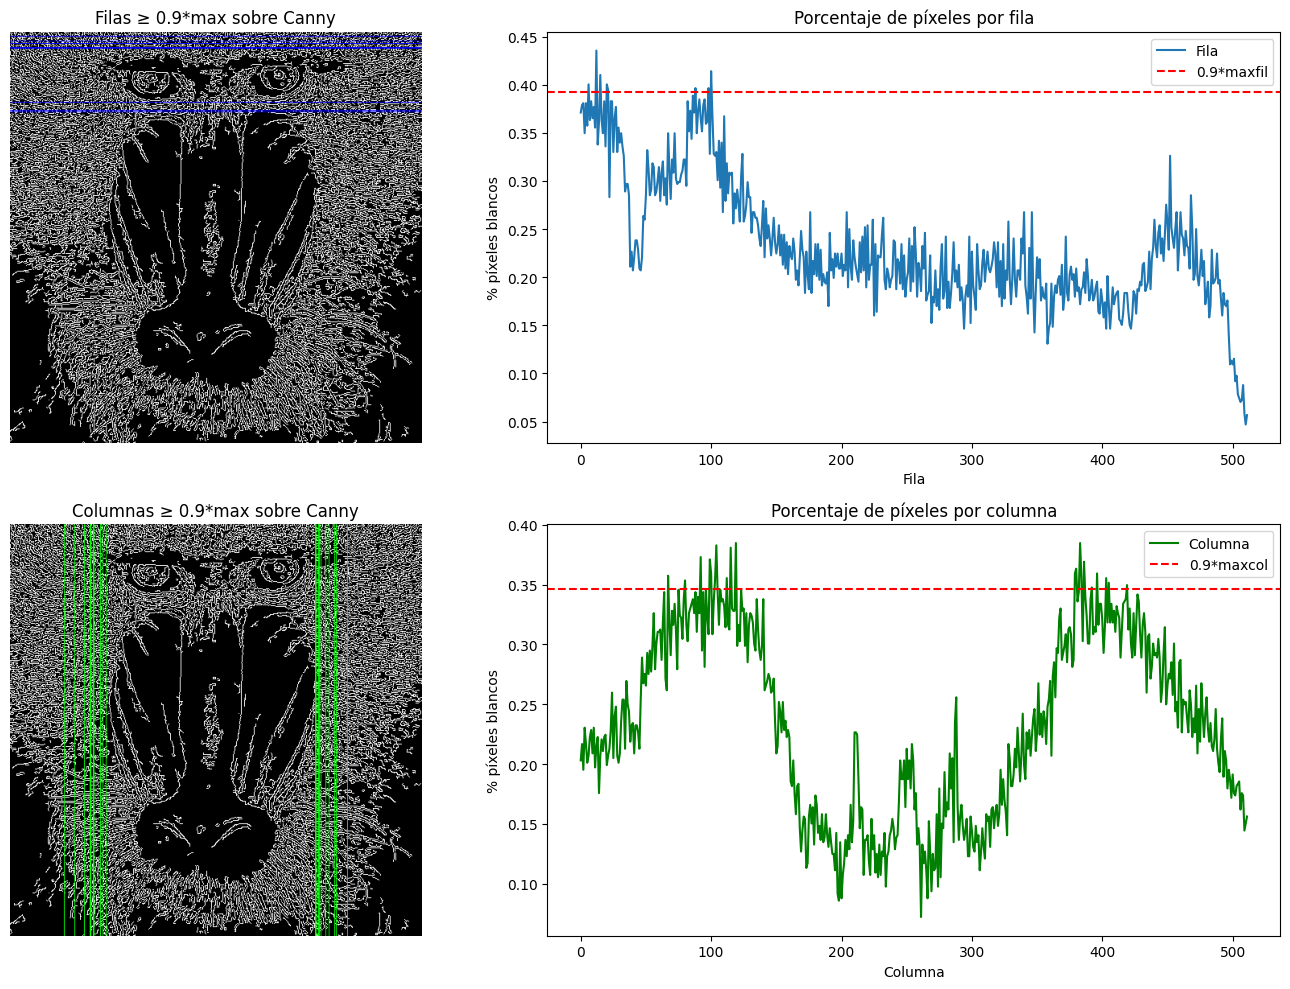

In [26]:
# Crear imágenes a color separadas para filas y columnas
canny_rows = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
canny_cols = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Pintar filas sobre la primera imagen
for r in rows_above_threshold:
    cv2.line(canny_rows, (0, r), (canny.shape[1]-1, r), (255,0,0), 1)  # azul filas

# Pintar columnas sobre la segunda imagen
for c in cols_above_threshold:
    cv2.line(canny_cols, (c, 0), (c, canny.shape[0]-1), (0,255,0), 1)  # verde columnas

# Plots Canny y gráficos
fig, axes = plt.subplots(2, 2, figsize=(14,10), gridspec_kw={'width_ratios':[1,1.2]})

# Imágenes
axes[0,0].imshow(cv2.cvtColor(canny_rows, cv2.COLOR_BGR2RGB))
axes[0,0].axis('off')
axes[0,0].set_title("Filas ≥ 0.9*max sobre Canny")

axes[1,0].imshow(cv2.cvtColor(canny_cols, cv2.COLOR_BGR2RGB))
axes[1,0].axis('off')
axes[1,0].set_title("Columnas ≥ 0.9*max sobre Canny")

# Gráficos
axes[0,1].plot(rows, label='Fila')
axes[0,1].axhline(y=threshold_row, color='r', linestyle='--', label='0.9*maxfil')
axes[0,1].set_xlabel("Fila")
axes[0,1].set_ylabel("% píxeles blancos")
axes[0,1].legend()
axes[0,1].set_title("Porcentaje de píxeles por fila")

axes[1,1].plot(cols, label='Columna', color='green')
axes[1,1].axhline(y=threshold_col, color='r', linestyle='--', label='0.9*maxcol')
axes[1,1].set_xlabel("Columna")
axes[1,1].set_ylabel("% píxeles blancos")
axes[1,1].legend()
axes[1,1].set_title("Porcentaje de píxeles por columna")

plt.tight_layout()
plt.show()

Visualizacion combinada sobre Canny y RGB

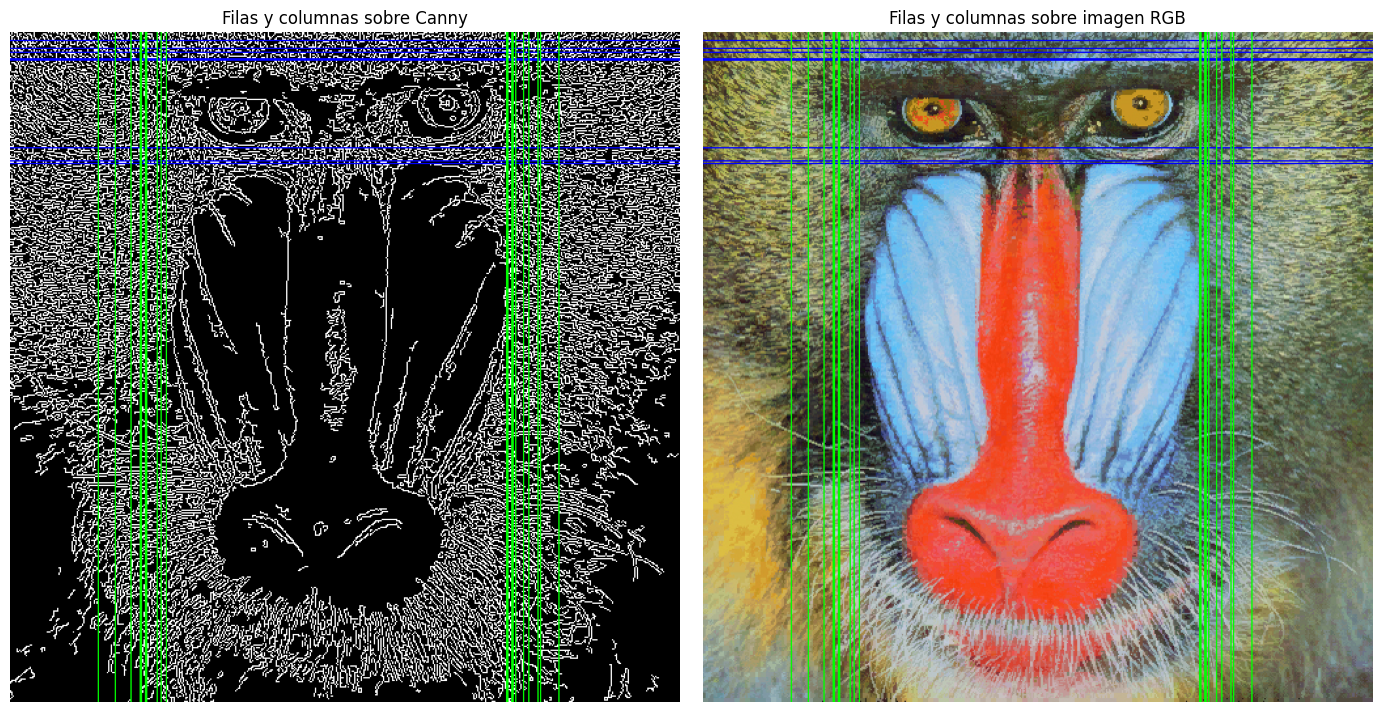

In [27]:
rgb_combined = img_rgb.copy()

# Pintar filas y columnas sobre Canny
canny_combined_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
for r in rows_above_threshold:
    cv2.line(canny_combined_color, (0, r), (canny_combined_color.shape[1]-1, r), (255,0,0), 1)
for c in cols_above_threshold:
    cv2.line(canny_combined_color, (c, 0), (c, canny_combined_color.shape[0]-1), (0,255,0), 1)
    
# Pintar filas y columnas sobre RGB
for r in rows_above_threshold:
    cv2.line(rgb_combined, (0, r), (rgb_combined.shape[1]-1, r), (0,0,255), 1)  # filas en rojo
for c in cols_above_threshold:
    cv2.line(rgb_combined, (c, 0), (c, rgb_combined.shape[0]-1), (0,255,0), 1)  # columnas en verde

# Plots combinados Canny y RGB
fig, axes = plt.subplots(1, 2, figsize=(14,7))

axes[0].imshow(cv2.cvtColor(canny_combined_color, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title("Filas y columnas sobre Canny")

axes[1].imshow(rgb_combined)
axes[1].axis('off')
axes[1].set_title("Filas y columnas sobre imagen RGB")

plt.tight_layout()
plt.show()

Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproxima el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1].

In [ ]:
vid = cv2.VideoCapture(2)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)

    # Convertir a gris y suavizar
    gris_actual = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gris_suavizado = cv2.GaussianBlur(gris_actual, (3, 3), 0)

    # Aplicar Sobel
    sobelx = cv2.Sobel(gris_suavizado, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gris_suavizado, cv2.CV_64F, 0, 1)
    sobel = cv2.add(sobelx, sobely)

    # Convertir a 8 bits
    sobelx_8 = cv2.convertScaleAbs(sobelx)
    sobely_8 = cv2.convertScaleAbs(sobely)
    sobel_8 = cv2.convertScaleAbs(sobel)

    # Asegurar que todas las imágenes sean BGR para concatenarlas
    sobelx_bgr = cv2.cvtColor(sobelx_8, cv2.COLOR_GRAY2BGR)
    sobely_bgr = cv2.cvtColor(sobely_8, cv2.COLOR_GRAY2BGR)
    sobel_bgr = cv2.cvtColor(sobel_8, cv2.COLOR_GRAY2BGR)

    # Añadir títulos a cada imagen
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0, 255, 0)   # Verde
    thickness = 2
    scale = 0.8

    cv2.putText(frame, 'Original', (10, 30), font, scale, color, thickness, cv2.LINE_AA)
    cv2.putText(sobelx_bgr, 'Bordes verticales (Sobel X)', (10, 30), font, scale, color, thickness, cv2.LINE_AA)
    cv2.putText(sobely_bgr, 'Bordes horizontales (Sobel Y)', (10, 30), font, scale, color, thickness, cv2.LINE_AA)
    cv2.putText(sobel_bgr, 'Combinado (Sobel X+Y)', (10, 30), font, scale, color, thickness, cv2.LINE_AA)

    # Crear la cuadrícula 2x2
    top = np.hstack((frame, sobel_bgr))
    bottom = np.hstack((sobely_bgr, sobelx_bgr))
    grid = np.vstack((top, bottom))

    # Mostrar la cuadrícula en una sola ventana
    cv2.imshow('Resultados Sobel (2x2)', grid)

    # Salir con ESC
    if cv2.waitKey(30) & 0xFF == 27:
        break

vid.release()
cv2.destroyAllWindows()


# TAREA 2: Umbralizado de Sobel y conteo de pixeles no nulos

Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

In [33]:
# ----------------- SOBEL -----------------
# Aplicar Sobel
ggris = cv2.GaussianBlur(img_gris, (3, 3), 0)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
sobel = cv2.add(sobelx, sobely)
sobel8 = cv2.convertScaleAbs(sobel)

# Umbralizado usando Otsu
_, sobel_thresh = cv2.threshold(sobel8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Conteo filas/columnas
row_counts_sobel = cv2.reduce(sobel_thresh, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:,0] / (255 * sobel_thresh.shape[1])
col_counts_sobel = cv2.reduce(sobel_thresh, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0,:] / (255 * sobel_thresh.shape[0])
rows_above_sobel = np.where(row_counts_sobel >= 0.9*np.max(row_counts_sobel))[0]
cols_above_sobel = np.where(col_counts_sobel >= 0.9*np.max(col_counts_sobel))[0]

print("=== Sobel (Otsu) ===")
print(f"Filas detectadas: {len(rows_above_sobel)}")
print(f"Columnas detectadas: {len(cols_above_sobel)}")
print(f"Localización filas: {rows_above_sobel}")
print(f"Localización columnas: {cols_above_sobel}\n")


=== Sobel (Otsu) ===
Filas detectadas: 19
Columnas detectadas: 5
Localización filas: [  2   3   4   7   8  12  19  20  24  51  52  80  81  82  83  84  85  87
 100]
Localización columnas: [104 105 127 287 288]



In [35]:
# ----------------- CANNY -----------------
canny = cv2.Canny(img_gris, 100, 200)

row_counts_canny = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:,0] / (255 * canny.shape[1])
col_counts_canny = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0,:] / (255 * canny.shape[0])
rows_above_canny = np.where(row_counts_canny >= 0.9*np.max(row_counts_canny))[0]
cols_above_canny = np.where(col_counts_canny >= 0.9*np.max(col_counts_canny))[0]

print("=== Canny ===")
print(f"Filas detectadas: {len(rows_above_canny)}")
print(f"Columnas detectadas: {len(cols_above_canny)}")
print(f"Localización filas: {rows_above_canny}")
print(f"Localización columnas: {cols_above_canny}\n")

=== Canny ===
Filas detectadas: 7
Columnas detectadas: 19
Localización filas: [  6  12  15  20  21  88 100]
Localización columnas: [ 67  86  92  96  99 100 103 104 105 112 115 119 123 379 380 383 392 396
 403]



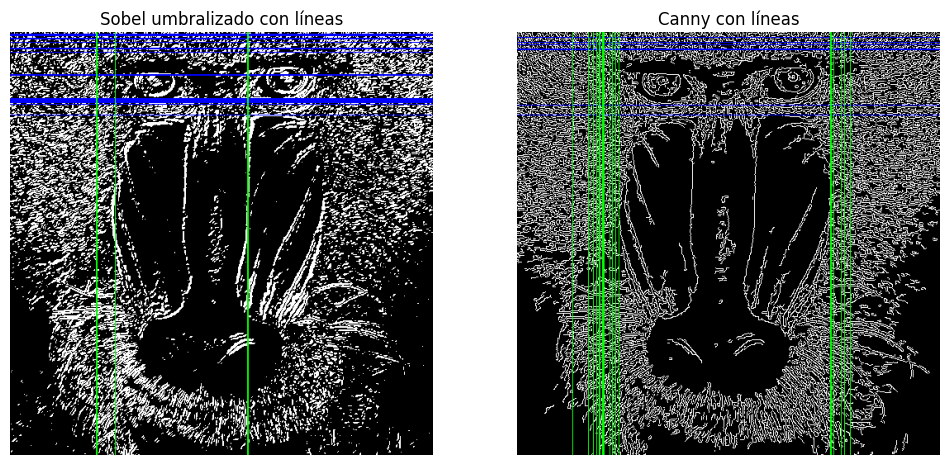

=== Valores máximos por fila y columna ===
Máximo filas Sobel: 0.48
Máximo filas Canny: 0.43
Máximo columnas Sobel: 0.48
Máximo columnas Canny: 0.37

Comparación relativa (Sobel y Canny):
Filas: 1.12 veces el máximo de Canny
Columnas: 1.31 veces el máximo de Canny


In [41]:
# Imagen Canny marcada
canny_marked = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
for r in rows_above_canny:
    cv2.line(canny_marked, (0,r), (canny_marked.shape[1]-1,r), (255,0,0), 1)
for c in cols_above_canny:
    cv2.line(canny_marked, (c,0), (c,canny_marked.shape[0]-1), (0,255,0), 1)

# Imagen Sobel marcada
sobel_marked = cv2.cvtColor(sobel_thresh, cv2.COLOR_GRAY2BGR)
for r in rows_above_sobel:
    cv2.line(sobel_marked, (0,r), (sobel_marked.shape[1]-1,r), (255,0,0), 1)
for c in cols_above_sobel:
    cv2.line(sobel_marked, (c,0), (c,sobel_marked.shape[0]-1), (0,255,0), 1)

# ----------------- Plots comparativos -----------------
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Sobel umbralizado con líneas")
plt.imshow(cv2.cvtColor(sobel_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Canny con líneas")
plt.imshow(cv2.cvtColor(canny_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# ----------------- Comparación de valores máximos -----------------
max_rows_sobel = np.max(row_counts_sobel)
max_cols_sobel = np.max(col_counts_sobel)
max_rows_canny = np.max(row_counts_canny)
max_cols_canny = np.max(col_counts_canny)

print("=== Valores máximos por fila y columna ===")
print(f"Máximo filas Sobel: {max_rows_sobel:.2f}")
print(f"Máximo filas Canny: {max_rows_canny:.2f}")
print(f"Máximo columnas Sobel: {max_cols_sobel:.2f}")
print(f"Máximo columnas Canny: {max_cols_canny:.2f}")

print("\nComparación relativa (Sobel y Canny):")
print(f"Filas: {max_rows_sobel/max_rows_canny:.2f} veces el máximo de Canny")
print(f"Columnas: {max_cols_sobel/max_cols_canny:.2f} veces el máximo de Canny")


Sobel (Otsu) → detecta más filas (bordes horizontales), incluye bordes débiles y algo de ruido.

Canny → detecta más columnas (bordes verticales), bordes finos y precisos, elimina bordes débiles.


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [42]:
vid = cv2.VideoCapture(2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

modos = ['Original', 'Diferencia', 'Sobel', 'Canny', 'Fondo']
modo = 0

mode_colors = {
    'Original': (255, 255, 255),
    'Diferencia': (0, 255, 255),
    'Sobel': (255, 128, 0),
    'Canny': (0, 255, 0),
    'Fondo': (255, 0, 255)
}

pframe = None
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

print("Image Processing Started!")
print("Press 'm' to switch mode")
print("Press ESC to exit")
print(f"Current mode: {modos[modo]}")

while True:
    ret, frame = vid.read()
    if not ret:
        print("Failed to grab frame")
        break

    frame = cv2.flip(frame, 1)
    display = frame.copy()

    # Diferencia Mode
    if modos[modo] == 'Diferencia' and pframe is not None:
        dif = cv2.absdiff(frame, pframe)
        _, display = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)

    # Sobel Mode
    elif modos[modo] == 'Sobel':
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ggris = cv2.GaussianBlur(gris, (3, 3), 0)
        sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
        sobel = cv2.add(sobelx, sobely)
        sobel8 = cv2.convertScaleAbs(sobel)
        _, sobel_thresh = cv2.threshold(sobel8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        row_counts = cv2.reduce(sobel_thresh, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:, 0] / (255 * sobel_thresh.shape[1])
        col_counts = cv2.reduce(sobel_thresh, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0, :] / (255 * sobel_thresh.shape[0])
        rows = np.where(row_counts >= 0.9 * np.max(row_counts))[0]
        cols = np.where(col_counts >= 0.9 * np.max(col_counts))[0]

        display = cv2.cvtColor(sobel8, cv2.COLOR_GRAY2BGR)
        for r in rows:
            cv2.line(display, (0, r), (display.shape[1] - 1, r), (255, 0, 0), 1)
        for c in cols:
            cv2.line(display, (c, 0), (c, display.shape[0] - 1), (0, 255, 0), 1)

    # Canny Mode
    elif modos[modo] == 'Canny':
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canny = cv2.Canny(gris, 100, 200)
        row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:, 0] / (255 * canny.shape[1])
        col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0, :] / (255 * canny.shape[0])
        rows = np.where(row_counts >= 0.9 * np.max(row_counts))[0]
        cols = np.where(col_counts >= 0.9 * np.max(col_counts))[0]

        display = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
        for r in rows:
            cv2.line(display, (0, r), (display.shape[1] - 1, r), (255, 0, 0), 1)
        for c in cols:
            cv2.line(display, (c, 0), (c, display.shape[0] - 1), (0, 255, 0), 1)

    # Fondo Mode
    elif modos[modo] == 'Fondo':
        objetos = eliminadorFondo.apply(frame)
        background = eliminadorFondo.getBackgroundImage()
        # Show object mask with color
        display = cv2.cvtColor(objetos, cv2.COLOR_GRAY2BGR)

    cv2.rectangle(display, (10, 10), (280, 50), (0, 0, 0), -1)
    cv2.putText(display, f"Mode: {modos[modo]}", (20, 35),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, mode_colors[modos[modo]], 2)
    
    cv2.putText(display, "Press 'm' to switch mode | ESC to exit", 
                (10, display.shape[0] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    cv2.imshow('Image Processing Demo', display)

    # Guarda el frame actual para el modo Diferencia
    pframe = frame.copy()

    key = cv2.waitKey(30) & 0xFF
    
    if key == 27:  # ESC to exit
        print("Exiting...")
        break
    elif key == ord('m') or key == ord('M'):
        modo = (modo + 1) % len(modos)
        print(f"Switched to: {modos[modo]}")

vid.release()
cv2.destroyAllWindows()
print("Processing stopped.")

Image Processing Started!
Press 'm' to switch mode
Press ESC to exit
Current mode: Original
Switched to: Diferencia
Switched to: Sobel
Switched to: Canny
Switched to: Fondo
Switched to: Original
Exiting...
Processing stopped.


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [ ]:
cap = cv2.VideoCapture(2)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Define rangos de color HSV
color_ranges = {
    'red': [(np.array([0, 120, 70]), np.array([10, 255, 255])),
            (np.array([170, 120, 70]), np.array([180, 255, 255]))],
    'green': [(np.array([40, 50, 50]), np.array([80, 255, 255]))],
    'blue': [(np.array([100, 100, 100]), np.array([130, 255, 255]))],
    'yellow': [(np.array([20, 100, 100]), np.array([35, 255, 255]))]
}

color_list = ['red', 'green', 'blue', 'yellow']
color_display = {
    'red': (0, 0, 255),
    'green': (0, 255, 0),
    'blue': (255, 0, 0),
    'yellow': (0, 255, 255)
}

# Modo: color único o multicolor
multicolor_mode = False
current_color_idx = 0
current_color = color_list[current_color_idx]

# Guarda la estela para cada color: cada punto es (x, y, timestamp)
trail_points = {color: deque(maxlen=100) for color in color_list}

# Tiempo de vida de la estela en segundos
TRAIL_LIFETIME = 2.5

# Kernel morfológico para reducción de ruido
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

print("Color Tracking Started!")
print("Press 'm' to switch color mode (single color)")
print("Press 'a' to toggle ALL colors tracking")
print("Press ESC to exit")
print(f"Mode: Single | Currently tracking: {current_color.upper()}")

def track_color(frame, hsv, color_name, current_time):
    """Track a specific color and return center point if found"""
    # Crea una máscara para el color actual
    mask = None
    for lower, upper in color_ranges[color_name]:
        if mask is None:
            mask = cv2.inRange(hsv, lower, upper)
        else:
            mask = cv2.bitwise_or(mask, cv2.inRange(hsv, lower, upper))

    # Operaciones morfológicas para eliminar ruido y llenar huecos
    mask = cv2.erode(mask, kernel, iterations=2)
    mask = cv2.dilate(mask, kernel, iterations=3)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Encuentra contornos
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encuentra el contorno mas grande
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(largest_contour)

        # Solo hace ´tracking´ si el area es significativa
        if area > 500:
            # Obtiene el centro del objeto
            M = cv2.moments(largest_contour)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])

                # Añade la coordenada a la estela con timestamp
                trail_points[color_name].append((cx, cy, current_time))

                # Dibuja un círculo alrededor del objeto detectado
                ((x, y), radius) = cv2.minEnclosingCircle(largest_contour)
                if radius > 10:
                    cv2.circle(frame, (int(x), int(y)), int(radius), 
                             color_display[color_name], 2)
                    cv2.circle(frame, (cx, cy), 5, color_display[color_name], -1)

def draw_trail(frame, color_name, current_time):
    """Dibuja la estela para un color específico"""
    points = trail_points[color_name]
    
    # Elimina puntos viejos
    while points and (current_time - points[0][2]) > TRAIL_LIFETIME:
        points.popleft()
    
    # Dibuja la estela
    if len(points) > 1:
        for i in range(1, len(points)):
            # Get age of this point
            age = current_time - points[i][2]
            
            # Calculate fade factor based on age
            fade_factor = 1.0 - (age / TRAIL_LIFETIME)
            fade_factor = max(0.0, min(1.0, fade_factor))
            
            # Calculate thickness (decreases with age)
            thickness = int(8 * fade_factor) + 1
            
            # Calculate alpha for transparency
            alpha = 0.2 + (0.8 * fade_factor)
            
            # Create overlay for this line segment
            overlay = frame.copy()
            
            # Draw line segment
            cv2.line(overlay, (points[i-1][0], points[i-1][1]), 
                    (points[i][0], points[i][1]),
                    color_display[color_name], thickness)
            
            # Apply alpha blending
            cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    
    # Flip frame for mirror effect
    frame = cv2.flip(frame, 1)
    current_time = time.time()
    
    # Convert to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Apply Gaussian blur to reduce noise
    hsv = cv2.GaussianBlur(hsv, (5, 5), 0)
    
    # Track colors based on mode
    if multicolor_mode:
        # Track all 4 colors simultaneously
        for color_name in color_list:
            track_color(frame, hsv, color_name, current_time)
            draw_trail(frame, color_name, current_time)
    else:
        # Track single color
        track_color(frame, hsv, current_color, current_time)
        draw_trail(frame, current_color, current_time)
    
    # Display current tracking mode
    mode_text = "MULTICOLOR" if multicolor_mode else f"Single: {current_color.upper()}"
    box_width = 300 if multicolor_mode else 250
    cv2.rectangle(frame, (10, 10), (box_width, 50), (0, 0, 0), -1)
    
    if multicolor_mode:
        cv2.putText(frame, "Tracking: ALL COLORS", (20, 35),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    else:
        cv2.putText(frame, f"Tracking: {current_color.upper()}", (20, 35),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color_display[current_color], 2)
    
    cv2.putText(frame, "Press 'm': switch | 'a': all colors | ESC: exit", 
                (10, frame.shape[0] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    cv2.imshow('Color Object Tracking with Trail', frame)
    
    key = cv2.waitKey(1) & 0xFF
    
    if key == 27:  # ESC key
        print("Exiting...")
        break
    elif key == ord('m') or key == ord('M'):
        if not multicolor_mode:
            current_color_idx = (current_color_idx + 1) % len(color_list)
            current_color = color_list[current_color_idx]
            for color in color_list:
                if color != current_color:
                    trail_points[color].clear()
            print(f"Switched to: {current_color.upper()}")
    elif key == ord('a') or key == ord('A'):
        multicolor_mode = not multicolor_mode
        if multicolor_mode:
            print("MULTICOLOR MODE: Tracking all 4 colors!")
        else:
            print(f"SINGLE COLOR MODE: Tracking {current_color.upper()}")
            for color in color_list:
                if color != current_color:
                    trail_points[color].clear()

# Cleanup
cap.release()
cv2.destroyAllWindows()
print("Tracking stopped.")

Color Tracking Started!
Press 'm' to switch color mode (single color)
Press 'a' to toggle ALL colors tracking
Press ESC to exit
Mode: Single | Currently tracking: RED


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/gcprado/anaconda3/envs/VC_P1/lib/python3.11/site-packages/cv2/qt/plugins"


Switched to: GREEN
Switched to: BLUE
Switched to: YELLOW
Switched to: RED
Switched to: GREEN
Switched to: BLUE
Switched to: YELLOW
Switched to: RED
Switched to: GREEN
Switched to: BLUE
Switched to: YELLOW
Switched to: RED
Switched to: GREEN
Switched to: BLUE
MULTICOLOR MODE: Tracking all 4 colors!
SINGLE COLOR MODE: Tracking BLUE
Switched to: YELLOW
Switched to: RED
Switched to: GREEN
Switched to: BLUE
Exiting...
Tracking stopped.
